Підключення необхідний бібліотек та імпортуємо DataSet.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random

data = pd.read_csv('Crypto_DataSet.csv')

Відображаємо перші 5 стовпчиків нашого DataSet.

In [9]:
data.set_index('Date', inplace=True)
data.head()

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Date,,,,,,,,
09/11/2017,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
10/11/2017,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
11/11/2017,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
12/11/2017,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
13/11/2017,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


Перевіряємо чи є у нашому DataSet пропущені значення.

In [10]:
if data.isnull().values.any():
    missing_values = data.isnull().values.sum()
    print(f'Кількість пропущенних значень: {missing_values}')
    print(data[data.isnull().values])
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
else:
    print('Наш Dataset не має пропущених значень.')

Наш Dataset не має пропущених значень.


Після виконання команди можемо побачити, що DataSet не містить значень типу "Nan", тому можемо продовжувати роботу.

In [11]:
MatrixView = data[:10]

(MatrixView.style
    .highlight_max(color='green')
    .highlight_min(color='red')
    .set_caption('Таблиця у матричному вигляді.')
)

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Date,,,,,,,,
09/11/2017,1.990770,19192200,7143.580078,3226249984,1.008180,358188000,320.884003,893249984
10/11/2017,1.796840,11155000,6618.140137,5208249856,1.006010,756446016,299.252991,885985984
11/11/2017,1.670470,8178150,6357.600098,4908680192,1.008990,746227968,314.681000,842300992
12/11/2017,1.519690,15298700,5950.069824,8957349888,1.012470,1466060032,307.907990,1613479936
13/11/2017,1.686620,12238800,6559.490234,6263249920,1.009350,767884032,316.716003,1041889984
14/11/2017,1.592580,7829600,6635.750000,3197110016,1.006830,429857984,337.631012,1069680000
15/11/2017,1.530450,7615500,7315.540039,4200880128,1.003180,449671008,333.356995,722665984
16/11/2017,1.577920,8928640,7871.689941,5123809792,1.002120,650278976,330.924011,797254016
17/11/2017,1.510360,8508840,7708.990234,4651670016,1.001390,639398016,332.394012,621732992


Expectation or expected value of an array.

In [33]:
data.mean()

Adj Close (BNB)     1.372335e+02
Volume (BNB)        9.678428e+08
Adj Close (BTC)     2.022448e+04
Volume (BTC)        2.574438e+10
Adj Close (USDT)    1.001696e+00
Volume (USDT)       4.097497e+10
Adj Close (ETH)     1.113977e+03
Volume (ETH)        1.295311e+10
dtype: float64

Dispersion.

In [13]:
np.var(data)

Adj Close (BNB)     3.441377e+04
Volume (BNB)        2.180625e+18
Adj Close (BTC)     3.024079e+08
Volume (BTC)        3.966321e+20
Adj Close (USDT)    3.468915e-05
Volume (USDT)       1.512333e+21
Adj Close (ETH)     1.506264e+06
Volume (ETH)        1.209410e+20
dtype: float64

Data standardization.

In [14]:
data_normalized = data.copy()
scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data_normalized

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Date,,,,,,,,
09/11/2017,0.000713,0.001067,0.060731,0.000869,0.373404,0.000000,0.050040,0.003238
10/11/2017,0.000425,0.000620,0.052563,0.006564,0.353896,0.001429,0.045464,0.003151
11/11/2017,0.000237,0.000454,0.048513,0.005703,0.380686,0.001392,0.048727,0.002630
12/11/2017,0.000014,0.000850,0.042178,0.017336,0.411971,0.003975,0.047295,0.011826
13/11/2017,0.000261,0.000680,0.051651,0.009595,0.383922,0.001470,0.049158,0.005010
...,...,...,...,...,...,...,...,...
23/08/2022,0.441310,0.057552,0.284336,0.083192,0.299867,0.188798,0.333870,0.211067
24/08/2022,0.437483,0.052016,0.282267,0.083434,0.299867,0.173480,0.332662,0.192690
25/08/2022,0.445092,0.054136,0.285467,0.080751,0.300766,0.163238,0.340996,0.169292


З таблиці можемо побачити, що кореляція досить велика, тобто існує певна схожість даних. Тому графіки можуть накладатися один на одного.

In [15]:
data_normalized.corr()

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Adj Close (BNB),1.000000,0.730196,0.914985,0.406387,-0.156941,0.658089,0.961540,0.570960
Volume (BNB),0.730196,1.000000,0.768045,0.600309,-0.117761,0.773394,0.654112,0.698769
Adj Close (BTC),0.914985,0.768045,1.000000,0.572624,-0.151928,0.773001,0.926190,0.671667
Volume (BTC),0.406387,0.600309,0.572624,1.000000,-0.096344,0.867497,0.383744,0.859666
Adj Close (USDT),-0.156941,-0.117761,-0.151928,-0.096344,1.000000,-0.140562,-0.151131,-0.120797
Volume (USDT),0.658089,0.773394,0.773001,0.867497,-0.140562,1.000000,0.629303,0.947698
Adj Close (ETH),0.961540,0.654112,0.926190,0.383744,-0.151131,0.629303,1.000000,0.546265
Volume (ETH),0.570960,0.698769,0.671667,0.859666,-0.120797,0.947698,0.546265,1.000000


Line Plot

([<matplotlib.axis.XTick at 0x1f9a1b20eb0>,
 [Text(1, 0, '10/11/2017'),
  Text(181, 0, '09/05/2018'),
  Text(361, 0, '05/11/2018'),
  Text(541, 0, '04/05/2019'),
  Text(721, 0, '31/10/2019'),
  Text(901, 0, '28/04/2020'),
  Text(1081, 0, '25/10/2020'),
  Text(1261, 0, '23/04/2021'),
  Text(1441, 0, '20/10/2021'),
  Text(1621, 0, '18/04/2022')])

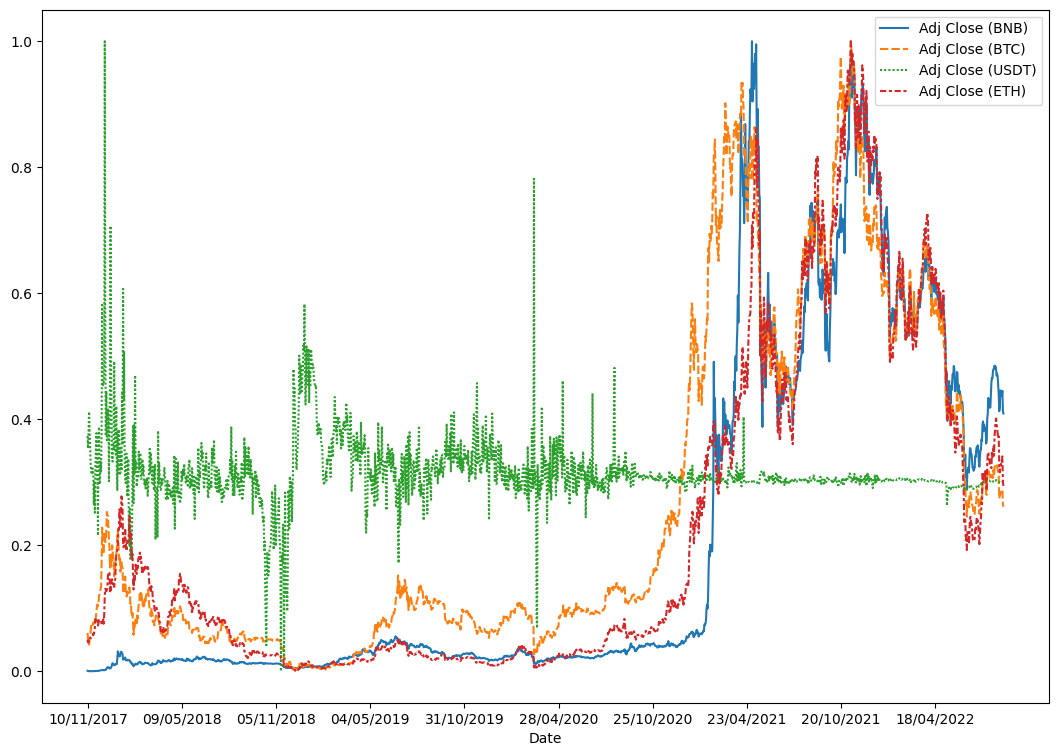

In [16]:
plt.figure(figsize=(13,9))
sns.lineplot(data=data_normalized[['Adj Close (BNB)', 'Adj Close (BTC)',  'Adj Close (USDT)',  'Adj Close (ETH)',]])
indexes1 = range(1, len(data_normalized), 180)
plt.xticks(indexes1)

Bar Plot

([<matplotlib.axis.XTick at 0x1f9a735f340>,
 [Text(1, 0, '10/11/2017'),
  Text(181, 0, '09/05/2018'),
  Text(361, 0, '05/11/2018'),
  Text(541, 0, '04/05/2019'),
  Text(721, 0, '31/10/2019'),
  Text(901, 0, '28/04/2020'),
  Text(1081, 0, '25/10/2020'),
  Text(1261, 0, '23/04/2021'),
  Text(1441, 0, '20/10/2021'),
  Text(1621, 0, '18/04/2022')])

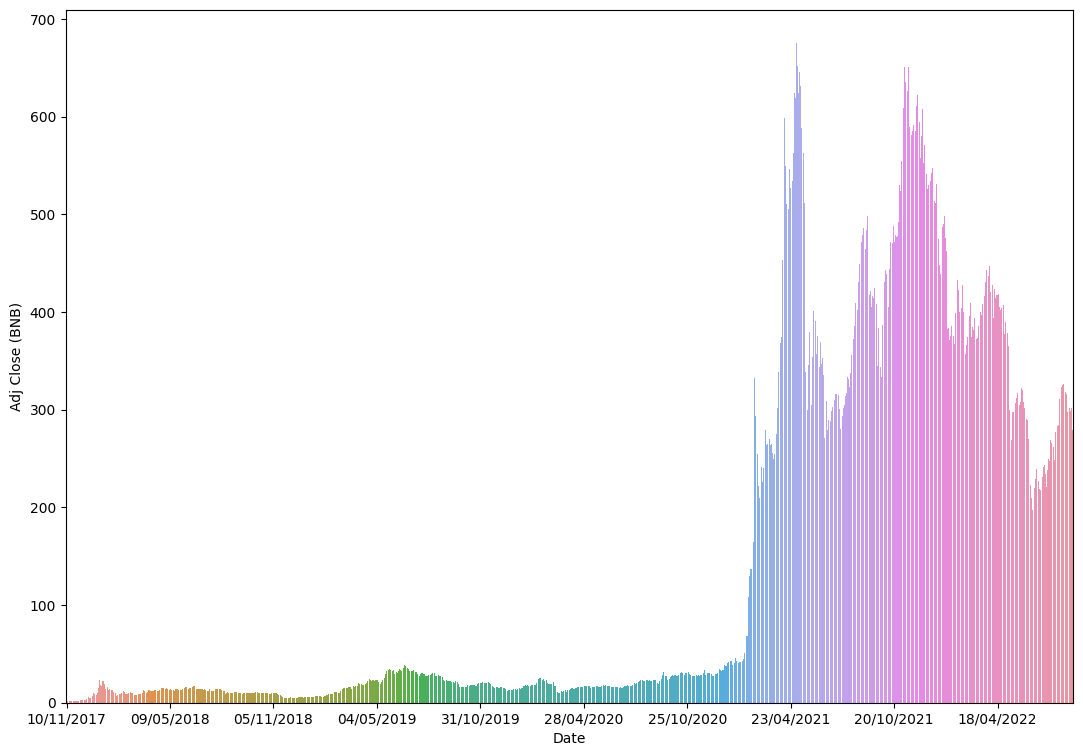

In [17]:
plt.figure(figsize=(13,9))
sns.barplot(x=data.index, y=data['Adj Close (BNB)'])
plt.xticks(indexes1)

Heat Map

<AxesSubplot: ylabel='Date'>

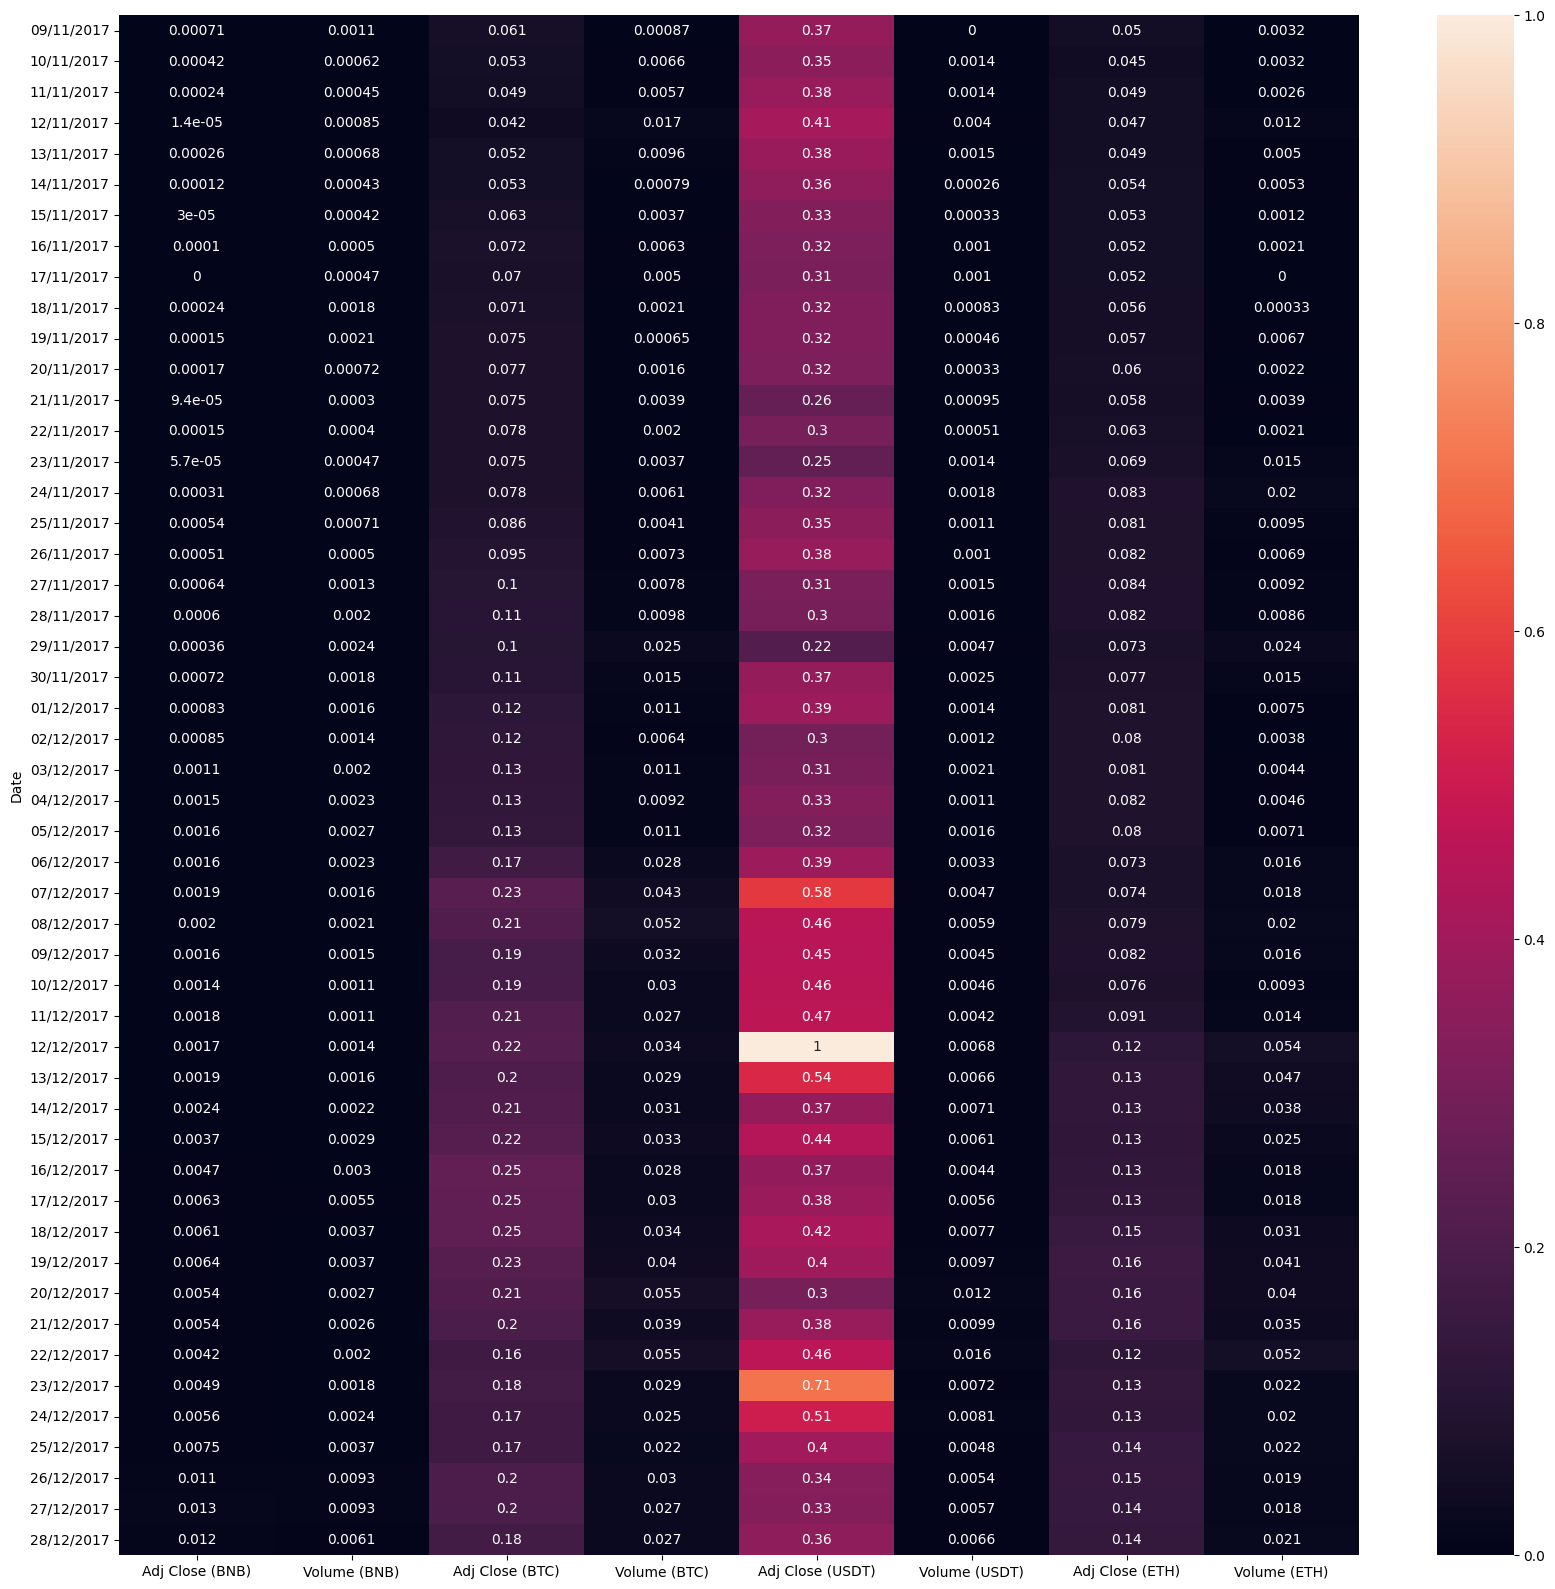

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data_normalized[:50], annot=True)

Histplot

<AxesSubplot: ylabel='Count'>

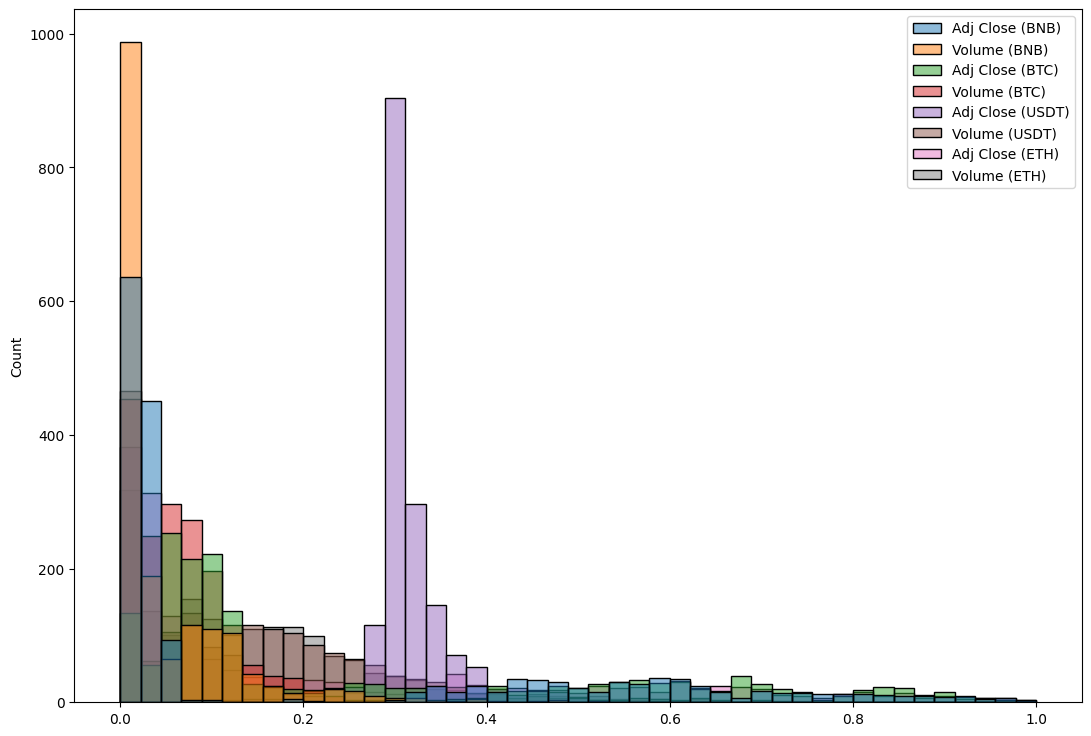

In [19]:
plt.subplots(figsize=(13,9))
sns.histplot(data=data_normalized)

Lineplot

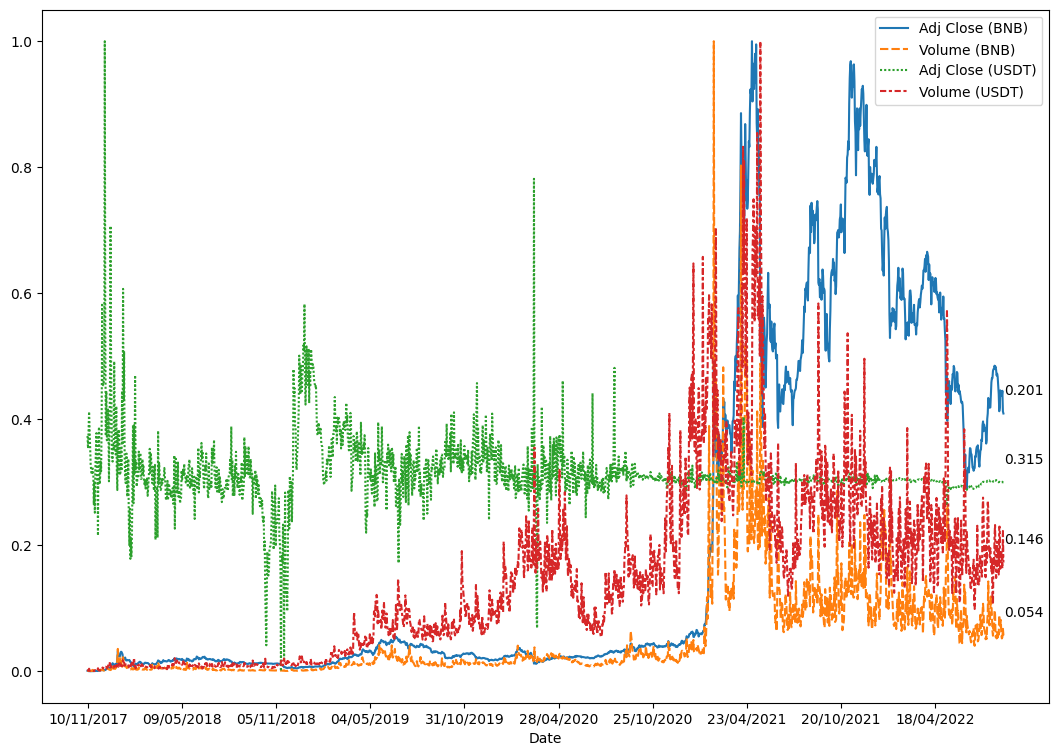

In [20]:
plt.figure(figsize=(13,9))
sns.lineplot(data=data_normalized[['Adj Close (BNB)', 'Volume (BNB)', 'Adj Close (USDT)', 'Volume (USDT)']])
plt.xticks(indexes1)

for i in ['Adj Close (BNB)', 'Volume (BNB)', 'Adj Close (USDT)', 'Volume (USDT)']:
  avrg = data_normalized.mean(axis=0)[i]
  arg = len(data_normalized[i])
  plt.annotate(str(round(avrg, 3)), xy=(arg, data_normalized[i][-1]+0.03))

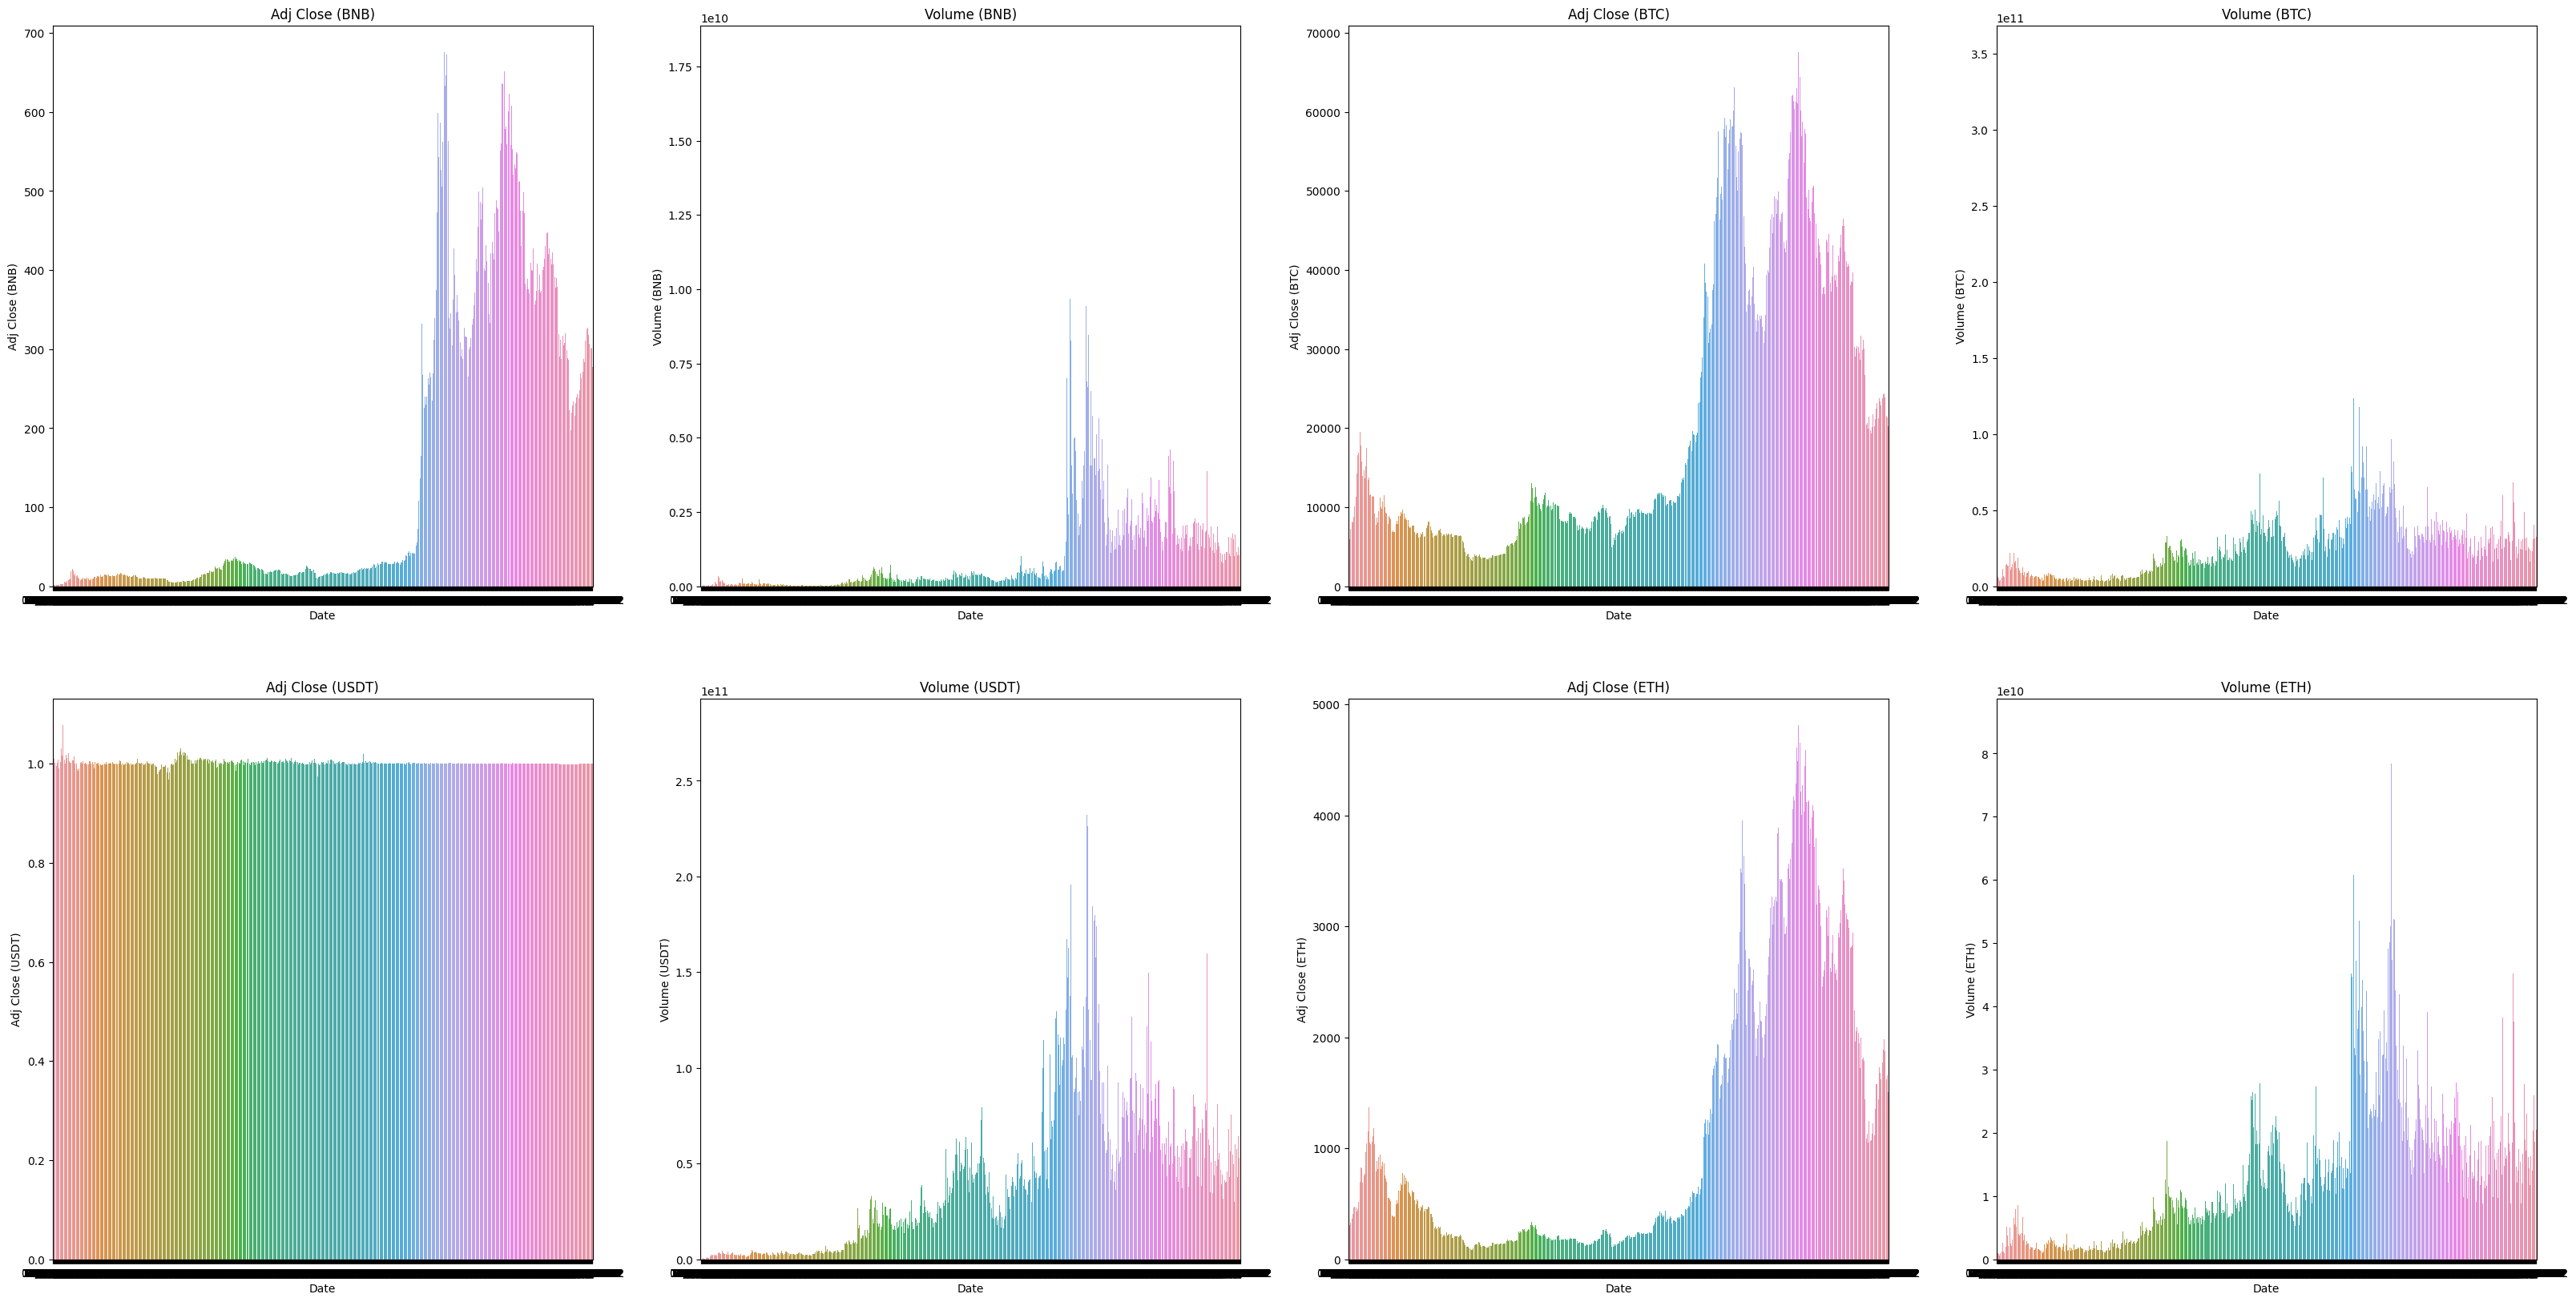

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(40, 20))
indexes2 = range(1, len(data_normalized), 500)
columns = data.columns
for i in range(8):
  sns.barplot(ax=axes[int(i/4), i%4], x=data.index, y=data[columns[i]])
  axes[int(i/4), i%4].set_title(f'{columns[i]}')
  

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular. 

In [32]:
cor_matrix = data_normalized.corr(method='pearson').abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
upper_tri

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Adj Close (BNB),NaN,0.730196,0.914985,0.406387,0.156941,0.658089,0.961540,0.570960
Volume (BNB),NaN,NaN,0.768045,0.600309,0.117761,0.773394,0.654112,0.698769
Adj Close (BTC),NaN,NaN,NaN,0.572624,0.151928,0.773001,0.926190,0.671667
Volume (BTC),NaN,NaN,NaN,NaN,0.096344,0.867497,0.383744,0.859666
Adj Close (USDT),NaN,NaN,NaN,NaN,NaN,0.140562,0.151131,0.120797
Volume (USDT),NaN,NaN,NaN,NaN,NaN,NaN,0.629303,0.947698
Adj Close (ETH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546265
Volume (ETH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
some_max_value = 0
result = {'Row': None, 'Column': None}

for i in upper_tri.columns[1:]:
    if some_max_value < max(upper_tri[i].tolist()):
        some_max_value = max(upper_tri[i].tolist())
        result.update({'Row': upper_tri.columns[upper_tri[i].tolist().index(some_max_value)], 'Column': i})
print( f"Max value: {some_max_value}.\n{result['Row']} - {result['Column']} ")

Max value: 0.9615397640407551.
Adj Close (BNB) - Adj Close (ETH) 


([<matplotlib.axis.XTick at 0x1f9ad12d720>,
 [Text(1, 0, '10/11/2017'),
  Text(501, 0, '25/03/2019'),
  Text(1001, 0, '06/08/2020'),
  Text(1501, 0, '19/12/2021')])

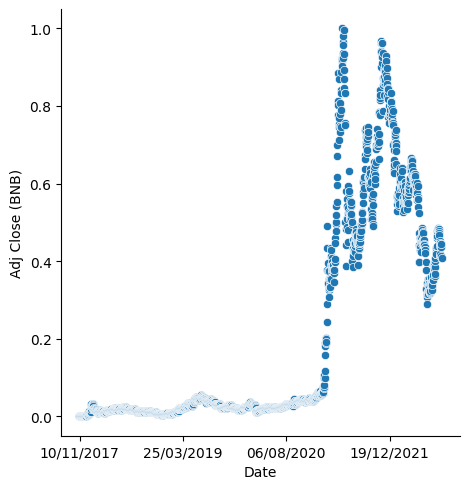

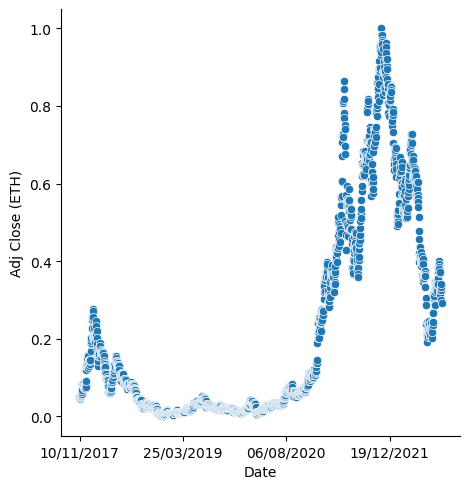

In [24]:
sns.relplot(data=data_normalized, x=data_normalized.index, y=result['Row'])
plt.xticks(indexes2)
sns.relplot(data=data_normalized, x=data_normalized.index, y=result['Column'])
plt.xticks(indexes2)

In [25]:
temporary_data = data_normalized[[f"{result['Row']}", f"{result['Column']}"]].copy()

def find_and_delete (name_of_column):
    while temporary_data[name_of_column].isnull().values.sum() != len(data_normalized)//10:
        num = random.randint(0, len(temporary_data)-1)
        if temporary_data[name_of_column].iloc[num].any() != None:
            temporary_data.iloc[[num], [temporary_data.columns.tolist().index(name_of_column)]] = None

find_and_delete(result['Row'])
find_and_delete(result['Column'])
temporary_data.dropna(inplace=True)

In [31]:
data_normalized.corr(method='pearson').abs().where(np.triu(np.ones(data_normalized.corr(method='pearson').abs().shape),k=1).astype(np.bool_))

,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
Adj Close (BNB),NaN,0.730196,0.914985,0.406387,0.156941,0.658089,0.961540,0.570960
Volume (BNB),NaN,NaN,0.768045,0.600309,0.117761,0.773394,0.654112,0.698769
Adj Close (BTC),NaN,NaN,NaN,0.572624,0.151928,0.773001,0.926190,0.671667
Volume (BTC),NaN,NaN,NaN,NaN,0.096344,0.867497,0.383744,0.859666
Adj Close (USDT),NaN,NaN,NaN,NaN,NaN,0.140562,0.151131,0.120797
Volume (USDT),NaN,NaN,NaN,NaN,NaN,NaN,0.629303,0.947698
Adj Close (ETH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546265
Volume (ETH),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
temporary_data.corr(method='pearson').abs().where(np.triu(np.ones(temporary_data.corr(method='pearson').abs().shape),k=1).astype(np.bool_))

,Adj Close (BNB),Adj Close (ETH)
Adj Close (BNB),NaN,0.964373
Adj Close (ETH),NaN,NaN


The first 53 indexes is 2017.
53:418 - 2018
418:783 - 2019
783:1149 - 2020
1149:1514 - 2021
1514: - 2022
#data_normalized[['Adj Close (BNB)', 'Adj Close (ETH)']][1514:]

In [28]:
parsed_data = {
    'years': [],
    'indexes': [],
    'Adj Close (BNB)' : [],
    'Adj Close (ETH)': []
}

def parsing():
    for i in range(len(temporary_data)-1):
        current = temporary_data.index.tolist()[i].split('/')[2]
        parsed_data['years'] += [current]
        parsed_data['indexes'] += [temporary_data.index.tolist()[i]]
        parsed_data['Adj Close (BNB)'] += [temporary_data.values[i][0]]
        parsed_data['Adj Close (ETH)'] += [temporary_data.values[i][1]]

parsing()

parsed_data = pd.DataFrame(parsed_data)

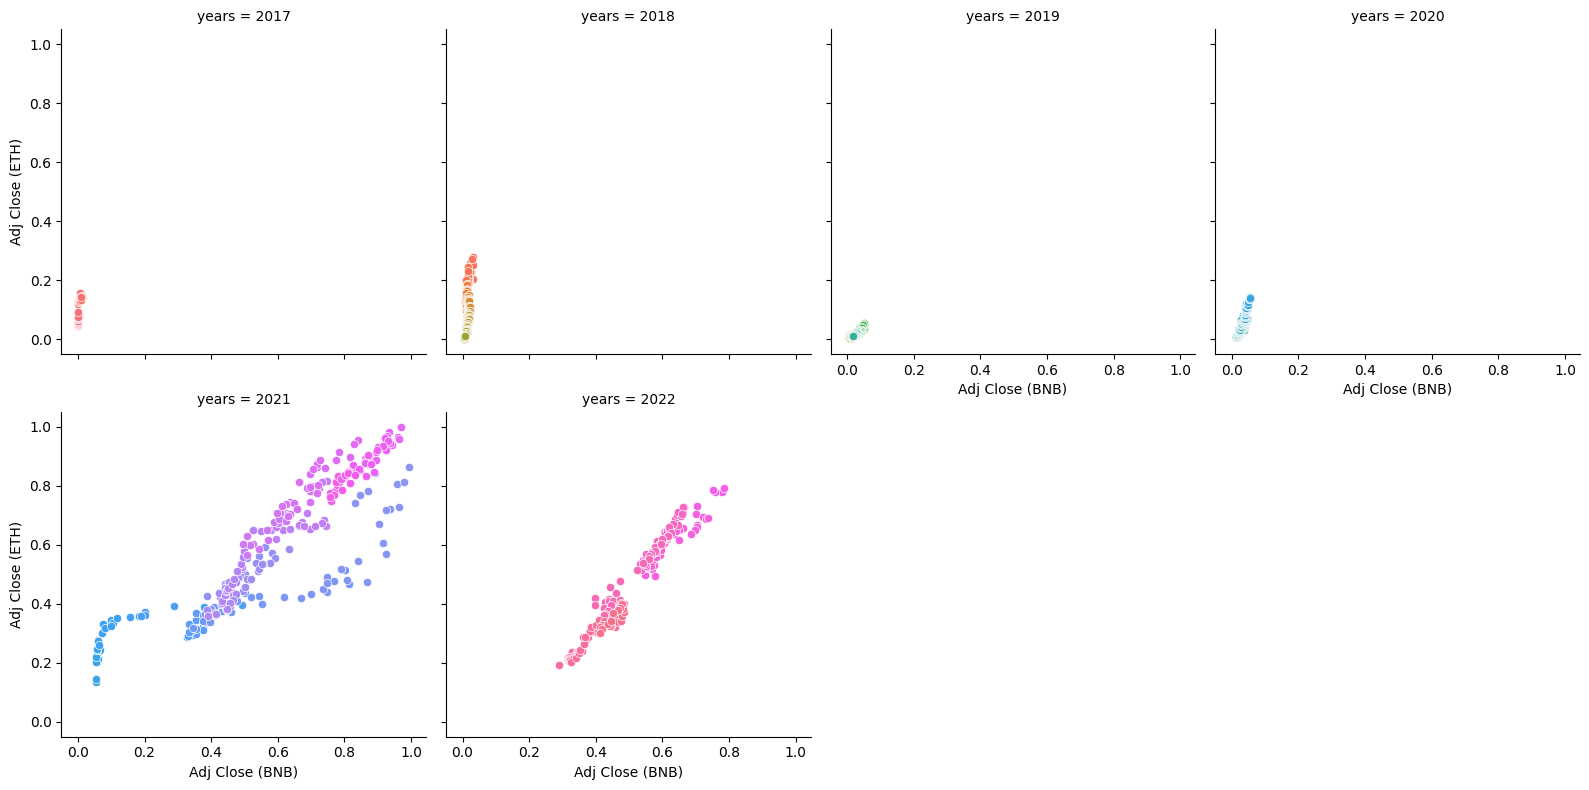

In [29]:
g = sns.FacetGrid(parsed_data, col='years', hue='indexes', height=4, col_wrap=4)
g.map(sns.scatterplot, 'Adj Close (BNB)', 'Adj Close (ETH)')
#g.add_legend(labels = list(parsed_data['indexes']), ncol = 5, fancybox=True, borderpad=1, loc='lower center')